# Proyek Analisis Data: E-Commerce Public Dataset

- Nama  : Farrel Faiz Baskara
- Email : farrelbaskara@gmail.com


In [984]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Pertanyaan Bisnis
1. **Segmentasi pelanggan**

 bagaimana distribusi pelanggan pada tiap negara dan kota? Negara atau kota apa yang memiliki jumlah customer terbesar, dan apakah bisa menunjukan pola atau tren?
2. **Peforma pengiriman**

  Seberapa baik peforma penjual dalam mencapai deadline pengiriman? apakah ada kolerasi antara peforma shipping dan kepuasan pelanggan?
3. **Kategori produk populer**

  apa kategori produk terlairs berdasarkan jumlah pemesanan? apakah bisa mengidentifikasi Produk terpopuler berdasarkan nilai total pembayaran

4. **Peforma Penjualan**

  Bagaimana performa penjualan dan revenue perusahaan dalam beberapa bulan terakhir?

5. **RFM Analysis**

  Analisis Recency, Frequency, Monetery

# Menyiapkan Libraries

In [985]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

# Data Gathering, Data Assessing, and Data Cleansing
mengumpulkan data-data dari csv yang telah disediakan, menilai data apakah ada yang salah dan perlu diperbaiki, kemudian membersihkan data berdasarkan masalah yang muncul.

*3 tahap ini disatukan karena merupakan cara yang menurut saya paling efektif untuk dataframe dengan jumlah yang banyak*

 ## **customers_df**





In [986]:
customers_df = pd.read_csv('/content/drive/MyDrive/DATA ANALYTICS/Project-1/E-Commerce Public Dataset/customers_dataset.csv')
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [987]:
# Mengecek value counts dari customer_unique_id
customer_unique_id_counts = customers_df['customer_unique_id'].value_counts()
customer_unique_id_counts

8d50f5eadf50201ccdcedfb9e2ac8455    17
3e43e6105506432c953e165fb2acf44c     9
1b6c7548a2a1f9037c1fd3ddfed95f33     7
ca77025e7201e3b30c44b472ff346268     7
6469f99c1f9dfae7733b25662e7f1782     7
                                    ..
081f07439678af2da7755a0aa572154d     1
9c57789a6a587f4efcfb01e36c106014     1
9e4c21635f640562de1a6976374fba03     1
06c0ea6ee892364d1608ee47aa9f56a0     1
84732c5050c01db9b23e19ba39899398     1
Name: customer_unique_id, Length: 96096, dtype: int64

In [988]:
# Check data
# cek tipe data
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [989]:
# cek missing value
customers_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [990]:
# cek duplicate data
customers_df.duplicated().sum()

0

## **geolocation_df**

In [991]:
geolocation_df = pd.read_csv('/content/drive/MyDrive/DATA ANALYTICS/Project-1/E-Commerce Public Dataset/geolocation_dataset.csv')
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [992]:
# Check data
# cek tipe data
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [993]:
# cek missing value
geolocation_df.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [994]:
# cek duplikasi
print('jumlah duplikat: ', geolocation_df.duplicated().sum())

# hapus duplikasi
geolocation_df.drop_duplicates(inplace=True)
print('jumlah diplikat setelah .drop_duplicates: ', geolocation_df.duplicated().sum())

# Overview
geolocation_df.head()

jumlah duplikat:  261831
jumlah diplikat setelah .drop_duplicates:  0


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


## **order_items_df**

In [995]:
order_items_df = pd.read_csv('/content/drive/MyDrive/DATA ANALYTICS/Project-1/E-Commerce Public Dataset/order_items_dataset.csv')
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [996]:
# Check data
# cek tipe data
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [997]:
# ganti tipe data dari object ke date
datetime_columns = ["shipping_limit_date"]

for column in datetime_columns:
  order_items_df[column] = pd.to_datetime(order_items_df[column])

# Check
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [998]:
# cek missing value
order_items_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [999]:
# cek duplicate
order_items_df.duplicated().sum()

0

In [1000]:
order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [1001]:
order_items_df['price'].nlargest(10)
# Tampaknya memang harganya yang mahal, bukan innacurate value

3556      6735.00
112233    6729.00
107841    6499.00
74336     4799.00
11249     4690.00
62086     4590.00
29193     4399.87
45843     4099.99
78310     4059.00
59137     3999.90
Name: price, dtype: float64

## **order_payments_df**

In [1002]:
order_payments_df = pd.read_csv('/content/drive/MyDrive/DATA ANALYTICS/Project-1/E-Commerce Public Dataset/order_payments_dataset.csv')
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [1003]:
# cek tipe data
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [1004]:
# cek missing value
order_payments_df.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [1005]:
# cek duplikasi
order_payments_df.duplicated().sum()

0

In [1006]:
# cek innacurate value
order_payments_df.describe()

# Cek apakah innacurate value
order_payments_df['payment_value'].nlargest(10)

# Tampaknya bukan innacurate value, jadi teruskan

52107    13664.08
34370     7274.88
41419     6929.31
49581     6922.21
85539     6726.66
62409     6081.54
43232     4950.34
70320     4809.44
6440      4764.34
67546     4681.78
Name: payment_value, dtype: float64

## **order_reviews_df**

In [1007]:
order_reviews_df = pd.read_csv('/content/drive/MyDrive/DATA ANALYTICS/Project-1/E-Commerce Public Dataset/order_reviews_dataset.csv')
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela Internet seguro e prático Parabéns a todos feliz Páscoa,2018-03-01 00:00:00,2018-03-02 10:26:53


In [1008]:
# Cek tipe data
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [1009]:
# Chante Dtype object to datetime
datetime_columns = ['review_creation_date', 'review_answer_timestamp']

for column in datetime_columns:
  order_reviews_df[column] = pd.to_datetime(order_reviews_df[column])

# Check
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


In [1010]:
# Cek missing values
order_reviews_df.isna().sum()

# Terdapat banyak missing values, namun tidak akan di lakukan apapun, karena kolom tersebut bersifat tidak signifikan

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [1011]:
# Cek duplikasi
order_reviews_df.duplicated().sum()

0

In [1012]:
# Cek Innacurate Value
order_reviews_df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


## **orders_df**

In [1013]:
orders_df = pd.read_csv('/content/drive/MyDrive/DATA ANALYTICS/Project-1/E-Commerce Public Dataset/orders_dataset.csv')
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [1014]:
# cek tipe data
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [1015]:
# Chante Dtype object to datetime
datetime_columns = ['order_purchase_timestamp','order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']

for column in datetime_columns:
  orders_df[column] = pd.to_datetime(orders_df[column])

# Check
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [1016]:
# cek missing value
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [1017]:
# karena yang missing bersifat tidak bisa di imputation bersifat waktu yang kontinu
# maka saya lakukan dropping

# Dropping Null values
columns_to_check = ['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date']
orders_df.dropna(subset=columns_to_check, inplace=True)

# check
orders_df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

In [1018]:
# cek duplikasi
orders_df.duplicated().sum()

0

## **product_category_name_df**

In [1019]:
product_category_name_df = pd.read_csv('/content/drive/MyDrive/DATA ANALYTICS/Project-1/E-Commerce Public Dataset/product_category_name_translation.csv')
product_category_name_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [1020]:
# cek data type
product_category_name_df.info() # Benar

# cek missing value
product_category_name_df.isna().sum() # 0

# cek duplikasi
product_category_name_df.duplicated().sum() # 0

# cek innacurate value
product_category_name_df.describe() # aman

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


## **products_df**

In [1021]:
products_df = pd.read_csv('/content/drive/MyDrive/DATA ANALYTICS/Project-1/E-Commerce Public Dataset/products_dataset.csv')
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [1022]:
# cek data type
products_df.info() # Benar

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [1023]:
# cek missing value
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [1024]:
# drop null values karena tidak signifikan
# Dropping Null values
columns_to_check = ['product_category_name', 'product_name_lenght','product_description_lenght','product_photos_qty',
                    'product_weight_g','product_length_cm','product_height_cm','product_width_cm']
products_df.dropna(subset=columns_to_check, inplace=True)

# check
products_df.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

In [1025]:
# cek duplikasi
products_df.duplicated().sum() # 0

0

In [1026]:
# cek innacurate value
products_df.describe() # aman

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000
mean,48.476592,771.492393,2.188961,2276.956586,30.854545,16.958813,23.208596
std,10.245699,635.124831,1.736787,4279.291845,16.955965,13.636115,12.078762
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


## **sellers_df**

In [1027]:
sellers_df = pd.read_csv('/content/drive/MyDrive/DATA ANALYTICS/Project-1/E-Commerce Public Dataset/sellers_dataset.csv')
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [1028]:
# cek datatype
sellers_df.info() # benar

# cek missing value
sellers_df.isna().sum() # 0

# cek duplikasi
sellers_df.duplicated().sum() # 0

# cek innacurate val
sellers_df.describe() # aman

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


## **overview**

In [1029]:
from tabulate import tabulate


# Create lists of dataframes and their respective column names
dataframes = ["customers_df", "geolocation_df", "order_items_df", "order_payments_df", "order_reviews_df",
              "orders_df", "product_category_name_df", "products_df", "sellers_df"]

c1 = customers_df.columns
c2 = geolocation_df.columns
c3 = order_items_df.columns
c4 = order_payments_df.columns
c5 = order_reviews_df.columns
c6 = orders_df.columns
c7 = product_category_name_df.columns
c8 = products_df.columns
c9 = sellers_df.columns

columns = [c1, c2, c3, c4, c5, c6, c7, c8, c9]

# Create a list of lists for the table
table_data = [[df, ', '.join(cols)] for df, cols in zip(dataframes, columns)]

# Print the table
print(tabulate(table_data, headers=["DataFrame", "Columns"], tablefmt="grid"))

+--------------------------+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| DataFrame                | Columns                                                                                                                                                                          |
+==========================+==================================================================================================================================================================================+
| customers_df             | customer_id, customer_unique_id, customer_zip_code_prefix, customer_city, customer_state                                                                                         |
+--------------------------+--------------------------------------------------------------------------------------------------------------------------------------------

# Exploratory Data Analysis (EDA)

## customers_df & geolocation_df

In [1030]:
# Eksplorasi data customers_df
print('jumlah total customer: ', customers_df['customer_id'].count())
customers_df.head()

jumlah total customer:  99441


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [1031]:
# Eksplorasi data geolocation dan drop kolom yang tidak dibutuhkan

columns_to_drop = ['geolocation_lat', 'geolocation_lng']

# Dropping the columns
geolocation_df = geolocation_df.drop(columns_to_drop, axis=1)

In [1032]:
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_city,geolocation_state
0,1037,sao paulo,SP
1,1046,sao paulo,SP
2,1046,sao paulo,SP
3,1041,sao paulo,SP
4,1035,sao paulo,SP


## semua order_df

In [1033]:
# Menggabungkan dataframe orders
order_items_df
order_payments_df
order_reviews_df
orders_df

merged_df = order_items_df.merge(order_payments_df, on='order_id', how='left')
merged_df = merged_df.merge(order_reviews_df, on='order_id', how='left')
merged_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,1.0,credit_card,2.0,72.19,97ca439bc427b48bc1cd7177abe71365,5.0,NaN,"Perfeito, produto entregue antes do combinado.",2017-09-21,2017-09-22 10:57:03
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,1.0,credit_card,3.0,259.83,7b07bacd811c4117b742569b04ce3580,4.0,NaN,NaN,2017-05-13,2017-05-15 11:34:13
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,1.0,credit_card,5.0,216.87,0c5b33dea94867d1ac402749e5438e8b,5.0,NaN,Chegou antes do prazo previsto e o produto surpreendeu pela qualidade. Muito satisfatório.,2018-01-23,2018-01-23 16:06:31
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,1.0,credit_card,2.0,25.78,f4028d019cb58564807486a6aaf33817,4.0,NaN,NaN,2018-08-15,2018-08-15 16:39:01
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,1.0,credit_card,3.0,218.04,940144190dcba6351888cafa43f3a3a5,5.0,NaN,Gostei pois veio no prazo determinado .,2017-03-02,2017-03-03 10:54:59


In [1034]:
orders_df = merged_df.merge(orders_df, on='order_id')
orders_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,...,review_comment_message,review_creation_date,review_answer_timestamp,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,1.0,credit_card,2.0,...,"Perfeito, produto entregue antes do combinado.",2017-09-21,2017-09-22 10:57:03,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,1.0,credit_card,3.0,...,NaN,2017-05-13,2017-05-15 11:34:13,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,1.0,credit_card,5.0,...,Chegou antes do prazo previsto e o produto surpreendeu pela qualidade. Muito satisfatório.,2018-01-23,2018-01-23 16:06:31,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,1.0,credit_card,2.0,...,NaN,2018-08-15,2018-08-15 16:39:01,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,1.0,credit_card,3.0,...,Gostei pois veio no prazo determinado .,2017-03-02,2017-03-03 10:54:59,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17


In [1035]:
# cek nama-nama kolom
for column in orders_df:
  print(column)

order_id
order_item_id
product_id
seller_id
shipping_limit_date
price
freight_value
payment_sequential
payment_type
payment_installments
payment_value
review_id
review_score
review_comment_title
review_comment_message
review_creation_date
review_answer_timestamp
customer_id
order_status
order_purchase_timestamp
order_approved_at
order_delivered_carrier_date
order_delivered_customer_date
order_estimated_delivery_date


## semua product_df

In [1036]:
# Menggabungkan products df dan product_category_name_df
products_df = products_df.merge(product_category_name_df, on='product_category_name', how='left')
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [1037]:
# Drop kolom yang tidak diperlukan
column_to_drop = products_df.columns[2:9]
products_df = products_df.drop(column_to_drop, axis=1)

In [1038]:
# Cek
products_df.head()

,product_id,product_category_name,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,housewares


In [1039]:
# Dataframe yang akan digunakan
customers_df
geolocation_df
orders_df
products_df

,product_id,product_category_name,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,housewares
...,...,...,...
32335,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,furniture_decor
32336,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,construction_tools_lights
32337,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,bed_bath_table
32338,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,computers_accessories


# Explanatory Data Analysis and Visualization
- Menjawab pertanyaan bisnis untuk membagikan insight
- Menggunakan Visualisasi Data
- RFM Analysis

## 1. **Segmentasi pelanggan**

 bagaimana distribusi pelanggan pada tiap negara dan kota? Negara atau kota apa yang memiliki jumlah customer terbesar, dan apakah bisa menunjukan pola atau tren?

In [1040]:
# Distribusi pelanggan tiap negara dan kota
# Gabung data customer_df dengan geolocation_df
customers_geolocation_df = customers_df.merge(geolocation_df,
                                              left_on='customer_zip_code_prefix',
                                              right_on='geolocation_zip_code_prefix')

# Menghitung customer per City dan State
customers_city_state = customers_geolocation_df.groupby(['customer_city', 'customer_state']).size().reset_index(name='customer_count')
customers_city_state.head()

# Ambil 20 terbesar dari City dan State
top_20_city = customers_city_state.nlargest(20,'customer_count')
top_20_city

,customer_city,customer_state,customer_count
3241,rio de janeiro,RJ,940474
3711,sao paulo,SP,762024
466,belo horizonte,MG,462213
2524,niteroi,RJ,201442
1177,curitiba,PR,161210
4080,uberlandia,MG,154390
3040,porto alegre,RS,141845
3515,santos,SP,134971
733,campinas,SP,125935
3476,santo andre,SP,115599


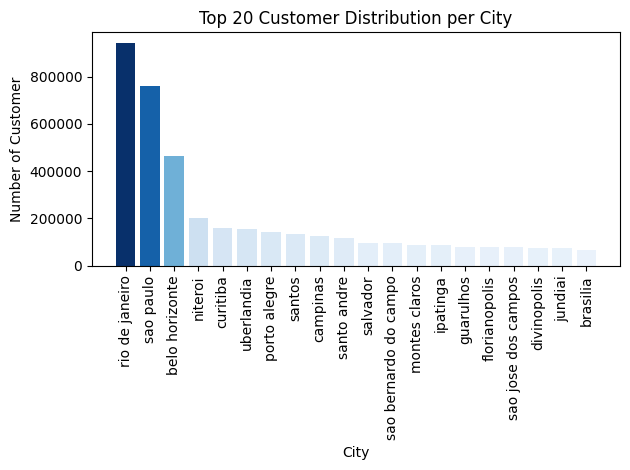

In [1041]:
# Visualisasi data
# Buat Color Gradient untuk Bar Plot
colors = cm.Blues(top_20_city['customer_count'] / top_20_city['customer_count'].max())

# Bar chart untuk top 10 city
plt.bar(top_20_city['customer_city'], top_20_city['customer_count'], color=colors)
plt.xlabel('City')
plt.ylabel('Number of Customer')
plt.title('Top 20 Customer Distribution per City')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

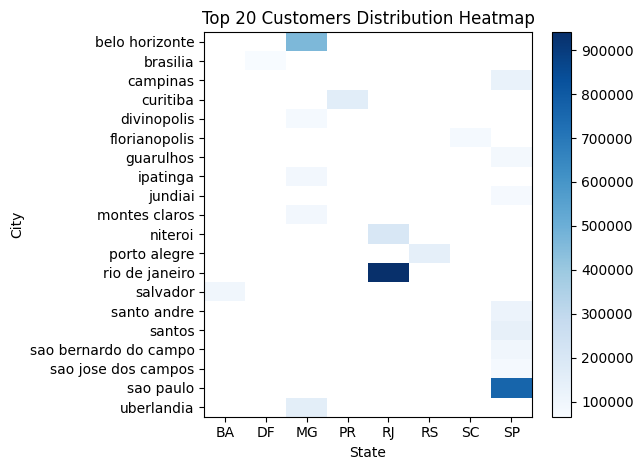

In [1042]:
# Heatmap untuk Top 20 State
heatmap_data = top_20_city.pivot(index='customer_city', columns='customer_state', values='customer_count')
plt.imshow(heatmap_data, cmap='Blues', aspect='auto')
plt.colorbar()
plt.xlabel('State')
plt.ylabel('City')
plt.title('Top 20 Customers Distribution Heatmap')
plt.xticks(range(len(heatmap_data.columns)), heatmap_data.columns)
plt.yticks(range(len(heatmap_data.index)), heatmap_data.index)
plt.tight_layout()
plt.show()

distribusi customer divisualisasikan state and cities pada visualisasi di atas

## 2. Peforma pengiriman

  Seberapa baik peforma penjual dalam mencapai deadline pengiriman? apakah ada kolerasi antara peforma shipping dan kepuasan pelanggan?

In [1043]:
# Seberapa Baik Peforma penjual dalam Mencapai Deadline Pengiriman
# Menghitung waktu pengiriman dalam hari
orders_df['delivery_time'] = (orders_df['order_delivered_customer_date'] - orders_df['order_delivered_carrier_date']).dt.days
orders_df.head()

# Menghitung waktu delay / keterlambatan pengiriman
orders_df['delivery_delay'] = (orders_df['order_delivered_customer_date'] - orders_df['order_estimated_delivery_date']).dt.days
orders_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,...,review_answer_timestamp,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,delivery_delay
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,1.0,credit_card,2.0,...,2017-09-22 10:57:03,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,1,-9
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,1.0,credit_card,3.0,...,2017-05-15 11:34:13,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,8,-3
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,1.0,credit_card,5.0,...,2018-01-23 16:06:31,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,6,-14
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,1.0,credit_card,2.0,...,2018-08-15 16:39:01,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,4,-6
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,1.0,credit_card,3.0,...,2017-03-03 10:54:59,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,13,-16


In [1044]:
# Menilai peforma pengiriman
average_delivery_time = orders_df['delivery_time'].mean()
median_delivery_time = orders_df['delivery_time'].median()
average_delivery_delay = orders_df['delivery_delay'].mean()

print(f"Average Delivery Time: {average_delivery_time:.2f} days")
print(f"Median Delivery Time: {median_delivery_time:.2f} days")
print(f"Average Delivery Delay: {average_delivery_delay:.2f} days")

Average Delivery Time: 8.75 days
Median Delivery Time: 7.00 days
Average Delivery Delay: -12.05 days


In [1045]:
# Analisis customer satisfaction
average_review_score = orders_df['review_score'].mean()
print(f"Average Customer Review Score: {average_review_score:.2f}")

Average Customer Review Score: 4.08


In [1046]:
# Analisis Korelasi
correlation_time = orders_df['delivery_time'].corr(orders_df['review_score'])
correlation_delay = orders_df['delivery_delay'].corr(orders_df['review_score'])

print(f"Correlation between Delivery Time and Review Score: {correlation_time:.2f}")
print(f"Correlation between Delivery Delay and Review Score: {correlation_delay:.2f}")

Correlation between Delivery Time and Review Score: -0.27
Correlation between Delivery Delay and Review Score: -0.23


Menunjukan korelasi yang lemah antara delivery_time & delivery_delay terhadap review score pengiriman

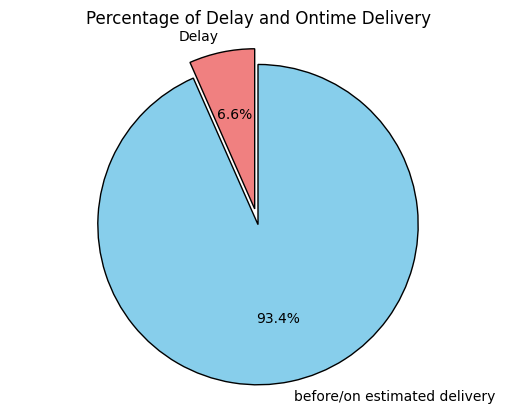

In [1047]:
# Assign dataframe sesuai dengan kriteria delay atau tidak
# Positif delay artinya dia delay
# Negative delay artinya dia tepat waktu
positive_delay_count = orders_df[orders_df['delivery_delay'] > 0].shape[0]
negative_delay_count = orders_df[orders_df['delivery_delay'] < 0].shape[0]

# Menghitung Persentase delay atau tidak
total_orders = len(orders_df)
positive_delay_percentage = (positive_delay_count / total_orders) * 100
negative_delay_percentage = (negative_delay_count / total_orders) * 100

# Membuat Pie Pie Chart
labels = ['Delay', 'before/on estimated delivery']
sizes = [positive_delay_percentage, negative_delay_percentage]
colors = ['lightcoral', 'skyblue',]
explode = (0, 0.1)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.

plt.title('Percentage of Delay and Ontime Delivery')
plt.show()

korelasi yang kecil, sehingga tidak bisa disimpulkan delay pengiriman memengaruhi review dari produk. meskipun tidak semuanya begitu

### Kira-kira apa yang menyebabkan review score 1 ?

In [1048]:
pd.set_option('display.max_colwidth', None)

# Filter 1-Score Reviews
one_score_reviews = order_reviews_df[order_reviews_df['review_score'] == 1]

# Hialngkan nilai Null
columns_to_check = ['review_comment_message']
one_score_reviews.dropna(subset=columns_to_check, inplace=True)

# Display 10 review pertama dengan skor-1
print("First 10 Review Comments for 1-Score Reviews:")
print(one_score_reviews['review_comment_message'].head(30))

First 10 Review Comments for 1-Score Reviews:
19                                                                                                                                                                                                               Péssimo
29                                                                                                                                                                                   Não gostei ! Comprei gato por lebre
32                                         Sempre compro pela Internet e a entrega ocorre antes do prazo combinado, que acredito ser o prazo máximo. No stark o prazo máximo já se esgotou e ainda não recebi o produto.
39                                                                                                                                                                                          Nada de chegar o meu pedido.
51                                                                                    

<ipython-input-1048-f911afc1b09b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_score_reviews.dropna(subset=columns_to_check, inplace=True)


ntuk mengidentifikasi penyebab dari **review comment bisa menggunakan teknik NLP, namun itu diluar dari scope project ini**, sehingga saya melakukan secara manual menggunakan **bantuan wordcloud**

dihasilkan kata kunci paling bermasalah adalah
1. product
2. delivery
3. response
4. store
5. lannister


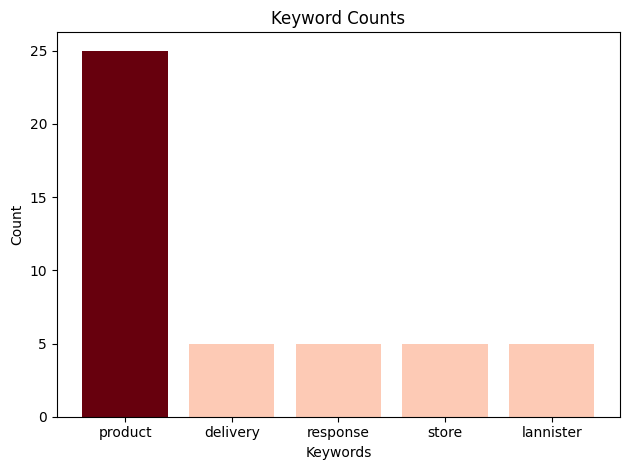

In [1049]:
# Berdasarkan https://monkeylearn.com/word-cloud/
# Didapatkan
keyword_count = {
    'product': 25,
    'delivery': 5,
    'response': 5,
    'store': 5,
    'lannister': 5
}

# Ekstrak Keyword ke dalam variabel
keywords = list(keyword_count.keys())
counts = list(keyword_count.values())

# Normalisasi count untuk Gradien
normalized_counts = [count / max(counts) for count in counts]

# Buat Bar Chart dengan Gradien Merah
bars = plt.bar(keywords, counts, color=plt.cm.Reds(normalized_counts))
plt.xlabel('Keywords')
plt.ylabel('Count')
plt.title('Keyword Counts')

plt.tight_layout()
plt.show()

**Kesimpulan Singkat**
1. Penyebab utama rating buruk, dengan sampling 30 comments, adalah tentang produk. **Produk yang mereka terima seringkali salah barang**, atau yang jumlahnya 2 hanya 1.
2. Penyebab lain adalah delivery, w**aktu delay ada yang sangat lama**, sehingga customer tidak puas
3. **Response yang buruk dari customer service** , seperti tidak ada refund ataupun membalas keluhan customer
4. **Store dan Merek Toko yang tidak reliable**, seperti contohnya lannister

## 3. **Kategori produk populer**

  apa kategori produk terlairs berdasarkan jumlah pemesanan? apakah bisa mengidentifikasi Produk terpopuler berdasarkan nilai total pembayaran?

In [1050]:
# Merge dataframe orders_df dengan products_df
orders_products_df = pd.merge(orders_df,products_df, on='product_id',how='left' )

# Hitung total jumlah order untuk tiap kategori produk
category_order_qty = orders_products_df.groupby('product_category_name_english')['order_item_id'].count()



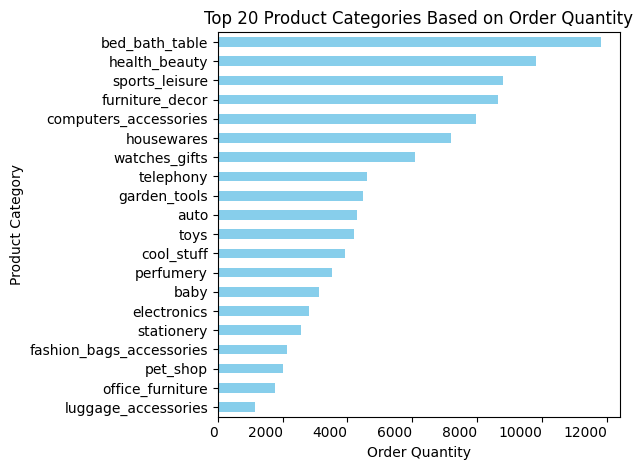


Top 20 Product Categories Based on Order Quantity:
product_category_name_english
luggage_accessories          1148
office_furniture             1763
pet_shop                     2007
fashion_bags_accessories     2125
stationery                   2572
electronics                  2808
baby                         3119
perfumery                    3508
cool_stuff                   3915
toys                         4193
auto                         4301
garden_tools                 4479
telephony                    4605
watches_gifts                6075
housewares                   7196
computers_accessories        7962
furniture_decor              8639
sports_leisure               8789
health_beauty                9818
bed_bath_table              11813
Name: order_item_id, dtype: int64


In [1051]:
# Temukan top 20 Kategori Produk berbasis kuantitas pemesanan (order)
top_20_cat = category_order_qty.nlargest(20)

# Urutkan
ascending_sorted_top_20_cat = top_20_cat.sort_values(ascending=True)

# Visualsiasi data dengan barplot
ascending_sorted_top_20_cat.plot(kind='barh', color='skyblue')
plt.ylabel('Product Category')
plt.xlabel('Order Quantity')
plt.title('Top 20 Product Categories Based on Order Quantity')
plt.xticks(rotation=0, ha='right')
plt.tight_layout()
plt.show()

# Tampilan 20 Product Terlaris
print("\nTop 20 Product Categories Based on Order Quantity:")
print(ascending_sorted_top_20_cat)

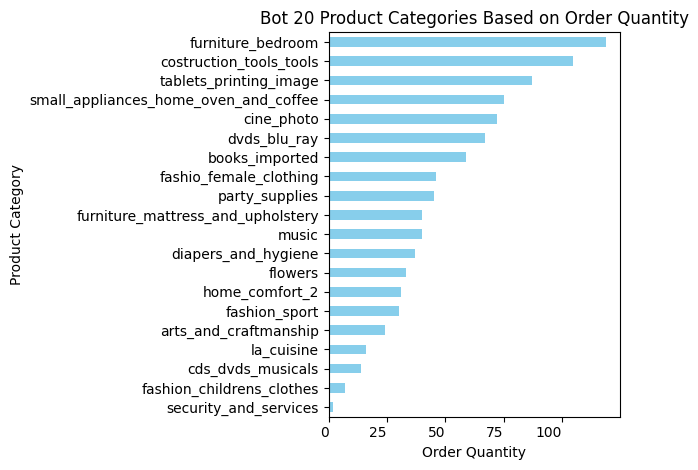


Bot 20 Product Categories Based on Order Quantity:
product_category_name_english
security_and_services                      2
fashion_childrens_clothes                  7
cds_dvds_musicals                         14
la_cuisine                                16
arts_and_craftmanship                     24
fashion_sport                             30
home_comfort_2                            31
flowers                                   33
diapers_and_hygiene                       37
music                                     40
furniture_mattress_and_upholstery         40
party_supplies                            45
fashio_female_clothing                    46
books_imported                            59
dvds_blu_ray                              67
cine_photo                                72
small_appliances_home_oven_and_coffee     75
tablets_printing_image                    87
costruction_tools_tools                  105
furniture_bedroom                        119
Name: order_item_i

In [1052]:
bot_20_cat = category_order_qty.nsmallest(20)
ascending_sorted_bot_20_cat=bot_20_cat.sort_values(ascending=True)
# Visualsiasi data dengan barplot

ascending_sorted_bot_20_cat.plot(kind='barh', color='skyblue')
plt.ylabel('Product Category')
plt.xlabel('Order Quantity')
plt.title('Bot 20 Product Categories Based on Order Quantity')
plt.xticks(rotation=0, ha='right')
plt.tight_layout()
plt.show()

# Tampilan 20 Product Terlaris
print("\nBot 20 Product Categories Based on Order Quantity:")
print(ascending_sorted_bot_20_cat)

In [1053]:
# Identifikasi Produk populer berdasarkan Nilai Total Pembayaran
orders_products_df

# Hitung total payment value untuk tiap kategori product
cat_payment = orders_products_df.groupby('product_category_name_english')['payment_value'].sum()


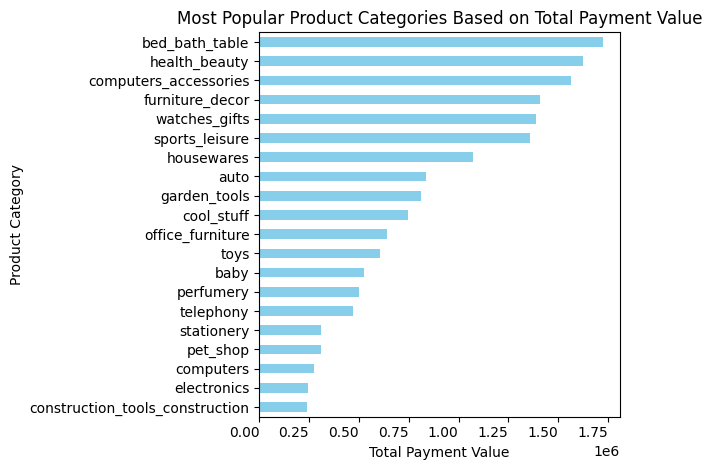

In [1054]:
# Ambil 20 Top
top_20_payment = cat_payment.nlargest(20)
ascending_sorted_top_20_payment=top_20_payment.sort_values(ascending=True)

# Visualisasi
ascending_sorted_top_20_payment.plot(kind='barh', color='skyblue')
plt.ylabel('Product Category')
plt.xlabel('Total Payment Value')
plt.title('Most Popular Product Categories Based on Total Payment Value')
plt.xticks(rotation=0, ha='right')
plt.tight_layout()
plt.show()

## 4. **Peforma Penjualan**

  Bagaimana performa penjualan dan revenue perusahaan dalam beberapa bulan terakhir?

To do this we need to
- create new dataframe to store information related to order and revenue of each month
- need to change frequencies, from days to months

In [1055]:
# resample data order_date jadi bulanan
# agreagsi thd data tersebut, untuk tau jumlah order dan total revenue tiap bulan
monthly_orders_df = orders_df.resample(rule='M', on='order_purchase_timestamp').agg({
    "order_id": "nunique",
    "payment_value": "sum"
})

monthly_orders_df.index = monthly_orders_df.index.strftime('%Y-%m')
monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "order_purchase_timestamp": "order_date",
    "order_id": "order_count",
    "payment_value": "revenue"
}, inplace=True)
monthly_orders_df.head()

,order_date,order_count,revenue
0,2016-09,1,0.00
1,2016-10,270,63030.53
2,2016-11,0,0.00
3,2016-12,1,19.62
4,2017-01,748,178167.17


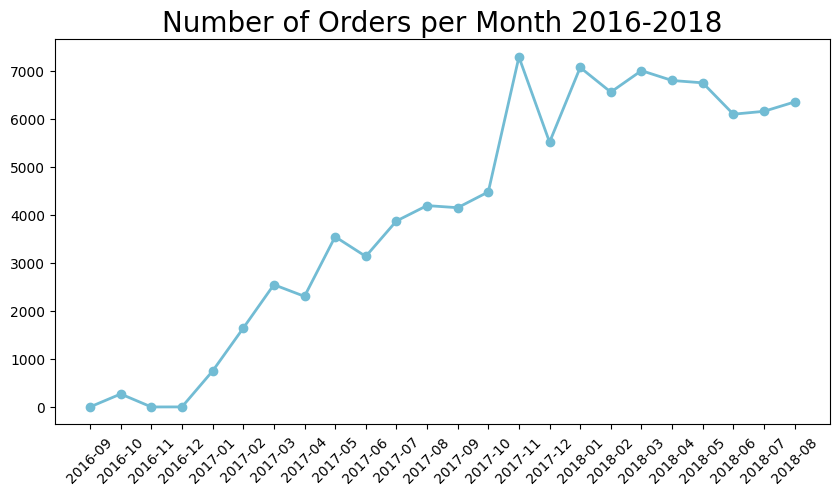

In [1056]:
plt.figure(figsize=(10, 5))
plt.plot(monthly_orders_df["order_date"], monthly_orders_df["order_count"], marker='o', linewidth=2, color="#72BCD4")
plt.title("Number of Orders per Month 2016-2018", loc="center", fontsize=20)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.show()

## RFM Analysis

RFM analysis merupakan salah satu metode yang umum digunakan untuk melakukan segmentasi pelanggan (mengelompokkan pelanggan ke dalam beberapa kategori) berdasarkan tiga parameter, yaitu recency, frequency, dan monetary.

Recency: parameter yang digunakan untuk melihat kapan terakhir seorang pelanggan melakukan transaksi.

Frequency: parameter ini digunakan untuk mengidentifikasi seberapa sering seorang pelanggan melakukan transaksi.

Monetary: parameter terakhir ini digunakan untuk mengidentifikasi seberapa besar revenue yang berasal dari pelanggan tersebut.

In [1065]:
# Hitung Recency - jumlah hari setelah pembelian terakhir dari tiap customer
last_purchase_date = orders_df['order_purchase_timestamp'].max()
orders_df['Recency'] = (last_purchase_date - orders_df['order_purchase_timestamp']).dt.days

# Hitung Frequency - jumlah order tiap customer
frequency_df = orders_df.groupby('customer_id')['order_id'].count().reset_index()
frequency_df.rename(columns={'order_id': 'Frequency'}, inplace=True)

# Hitung Monetary - total monetary value dari order tiap customer
monetary_df = orders_df.groupby('customer_id')['payment_value'].sum().reset_index()
monetary_df.rename(columns={'payment_value': 'Monetary'}, inplace=True)

In [1066]:
# Gabungkan Recency, Frequency, dan Monetary DF
rfm_df = pd.merge(frequency_df, monetary_df, on='customer_id', how='inner')
rfm_df = pd.merge(rfm_df, orders_df[['customer_id', 'Recency']], on='customer_id', how='inner')

In [1068]:
# Menampilkan dataframe
print("RFM Analysis:")
print(rfm_df.head())

RFM Analysis:
                        customer_id  Frequency  Monetary  Recency
0  00012a2ce6f8dcda20d059ce98491703          1    114.74      287
1  000161a058600d5901f007fab4c27140          1     67.41      409
2  0001fd6190edaaf884bcaf3d49edf079          1    195.42      547
3  0002414f95344307404f0ace7a26f1d5          1    179.35      378
4  000379cdec625522490c315e70c7a9fb          1    107.01      149


Text(0.5, 1.0, 'Frequency Distribution')

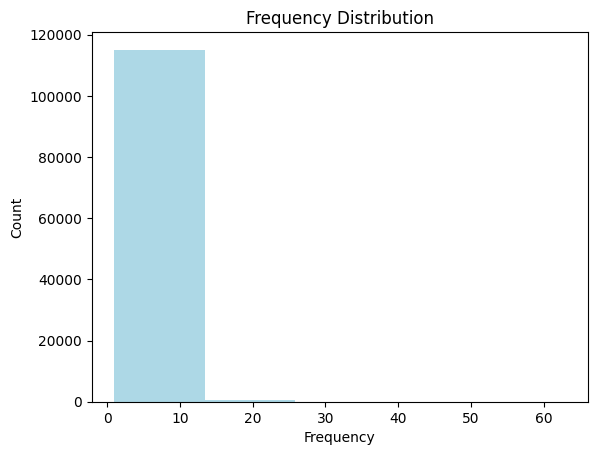

In [1075]:
# Frequency plot
plt.hist(rfm_df['Frequency'], bins=5, color='lightblue')
plt.xlabel('Frequency')
plt.ylabel('Count')
plt.title('Frequency Distribution')



Text(0.5, 1.0, 'Monetary Distribution')

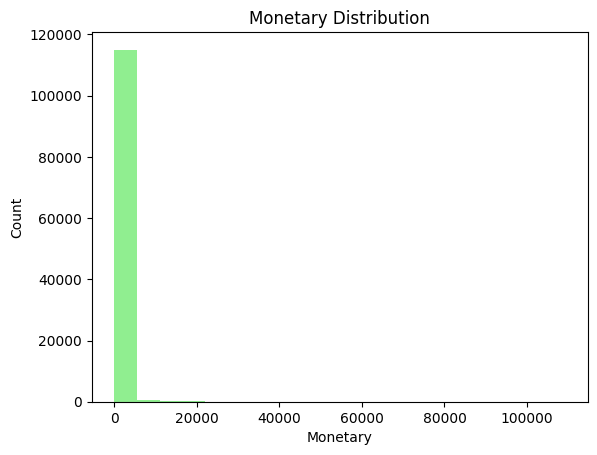

In [1071]:

# Monetary plot
plt.hist(rfm_df['Monetary'], bins=20, color='lightgreen')
plt.xlabel('Monetary')
plt.ylabel('Count')
plt.title('Monetary Distribution')



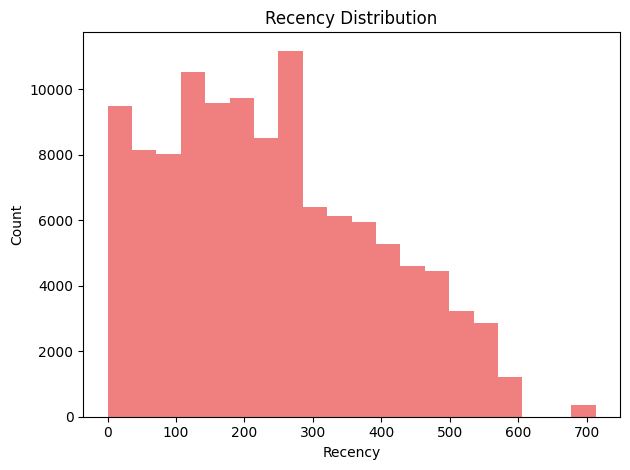

In [1074]:
# Recency plot

plt.hist(rfm_df['Recency'], bins=20, color='lightcoral')
plt.xlabel('Recency')
plt.ylabel('Count')
plt.title('Recency Distribution')

plt.tight_layout()
plt.show()